# Nearest Neighbours and Sparse Features

While trying to apply k-nearest neighbours classifier database, we might face a tricky issue. Let's try to find out what it is, why it is happening and how to solve it.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

c:\python370_x64\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Get the data

We use the package [mnist](https://github.com/datapythonista/mnist).

In [2]:
import mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_X = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
test_X = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))

In [5]:
train_X.shape, train_labels.shape

((60000, 784), (60000,))

In [6]:
train_X[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Train a classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm="kd_tree")
knn

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
knn.fit(train_X, train_labels)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The memory consumption is quite huge. The first hill is training, the second one is the beginning of testing.

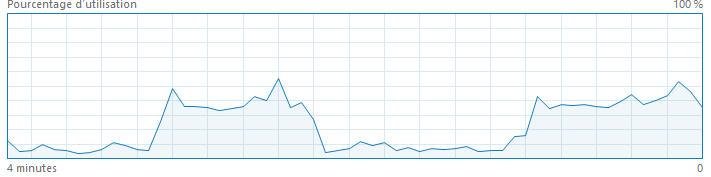

In [9]:
from pyquickhelper.helpgen.utils_sphinx_config import NbImage
NbImage("images/train.png")

## Predict

In [10]:
# do not do it, it takes for ever.
# yest = knn.predict(test_X)

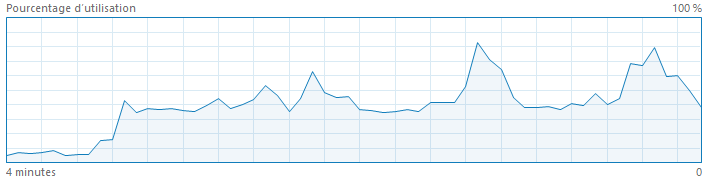

In [11]:
NbImage("images/test.png")

## Enigma

The process almost does not end. We chose a [k-d tree](https://en.wikipedia.org/wiki/K-d_tree) to optimize the neighbours search. Why does it take so much memory and so much time? What would you do to optimize it?